# Imports

Import Libraries

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
pd.set_option('display.max_columns',100)

Importing Data

In [2]:
# Load Data (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)
file_path = 'Hotel Reservations.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [4]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

In [5]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
df["booking_status"].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [8]:
df["market_segment_type"].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [9]:
df["room_type_reserved"].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [10]:
df["type_of_meal_plan"].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Going to drop booking ID because I don't see any value in it

In [11]:
df=df.drop(columns=['Booking_ID'])


In [12]:
df.describe().round()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count       36275.0         36275.0               36275.0            36275.0   
mean            2.0             0.0                   1.0                2.0   
std             1.0             0.0                   1.0                1.0   
min             0.0             0.0                   0.0                0.0   
25%             2.0             0.0                   0.0                1.0   
50%             2.0             0.0                   1.0                2.0   
75%             2.0             0.0                   2.0                3.0   
max             4.0            10.0                   7.0               17.0   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
count                     36275.0    36275.0       36275.0        36275.0   
mean                          0.0       85.0        2018.0            7.0   
std                           0.0       86.0           0.0            3.0   
min                           0.0        0.0        2017.0            1.0   
25%                           0.0       17.0        2018.0            5.0   
50%                           0.0       57.0        2018.0            8.0   
75%                           0.0      126.0        2018.0           10.0   
max                           1.0      443.0        2018.0           12.0   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count       36275.0         36275.0                       36275.0   
mean           16.0             0.0                           0.0   
std             9.0             0.0                           0.0   
min             1.0             0.0                           0.0   
25%             8.0             0.0                           0.0   
50%            16.0             0.0                           0.0   
75%            23.0             0.0                           0.0   
max            31.0             1.0                          13.0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                               36275.0             36275.0   
mean                                    0.0               103.0   
std                                     2.0                35.0   
min                                     0.0                 0.0   
25%                                     0.0                80.0   
50%                                     0.0                99.0   
75%                                     0.0               120.0   
max                                    58.0               540.0   

       no_of_special_requests  
count                 36275.0  
mean                      1.0  
std                       1.0  
min                       0.0  
25%                       0.0  
50%                       0.0  
75%                       1.0  
max                       5.0

In [13]:
df["no_of_children"].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

Only one row with 10 children, it's kind of strange but can be a school trip as there are two 9 children values!
For now I will not delete the rows and I may try to delete it later on and see if there are any changes.

The data seems clean enough the only problems will come with balancing

C:\Users\lewis\AppData\Local\Temp\ipykernel_6480\3250033177.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, ax=ax)


<Axes: >

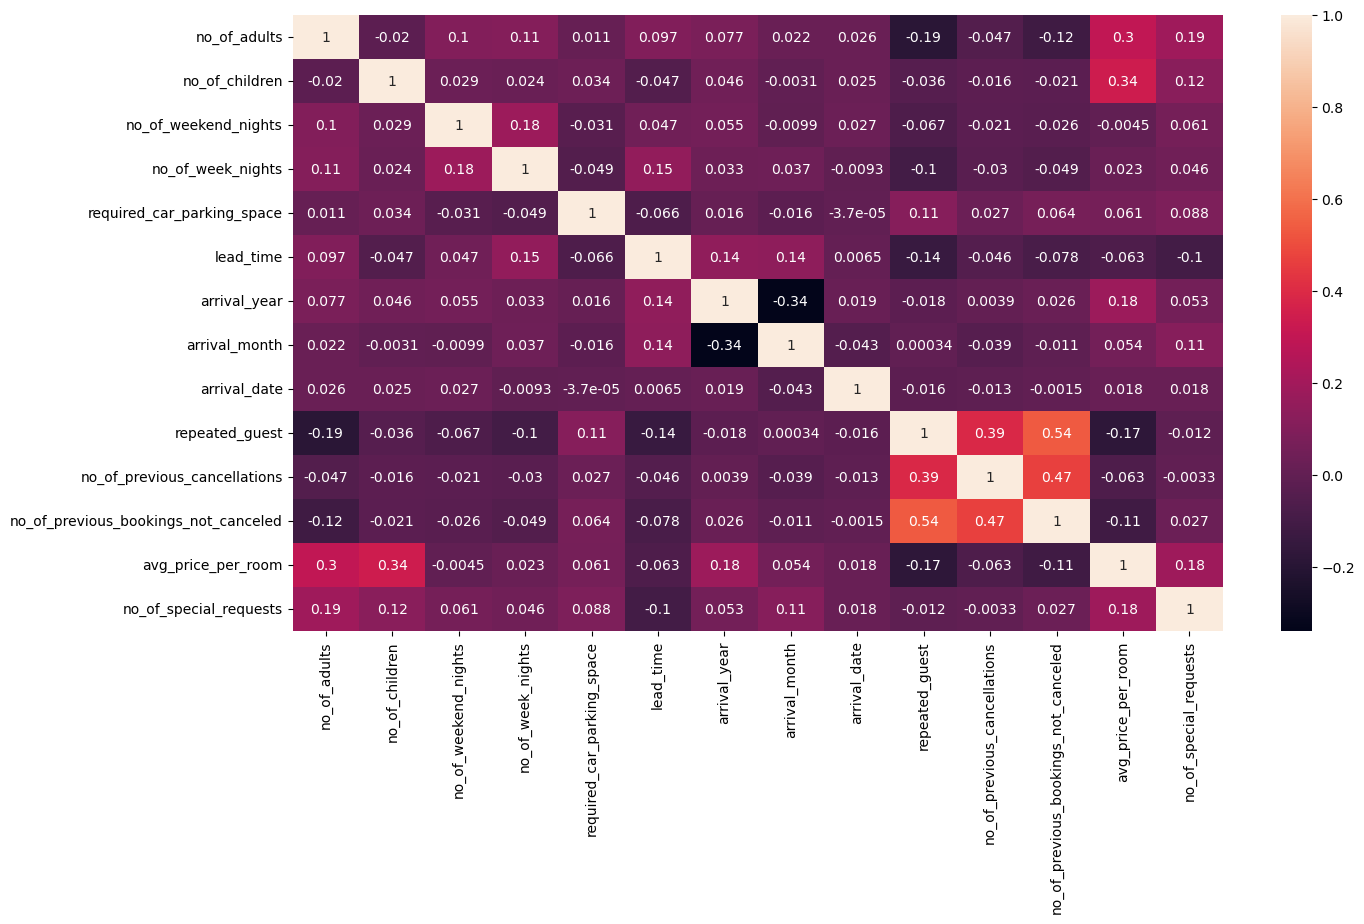

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [15]:
def plot_bar(data,x, y, figsize=(10,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

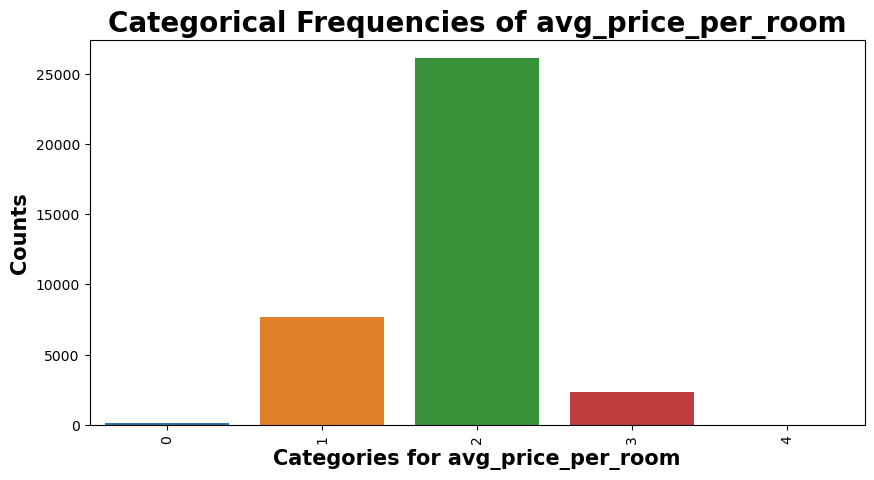

In [16]:
plot_bar(df, 'no_of_adults', 'avg_price_per_room');


It seems that couples tend to spend more on the room than other number of guest which suggest that couples should be the client to target with promotions and ads.

<Axes: xlabel='arrival_month'>

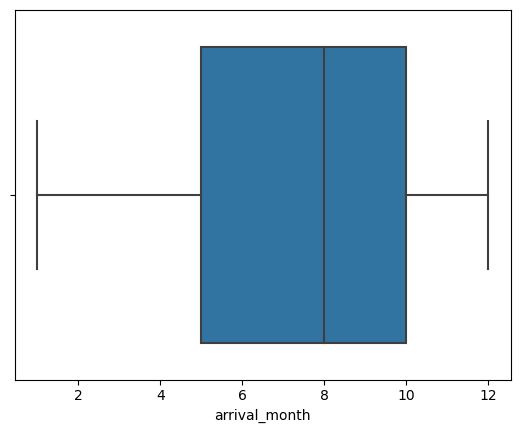

In [17]:
sns.boxplot(x=df["arrival_month"])

We can see that people visit this hotel mostly the summer and the mean is in the month 8 therefore I would suggest to add more summer attractions like improved pools activities.

<Axes: xlabel='arrival_month', ylabel='no_of_week_nights'>

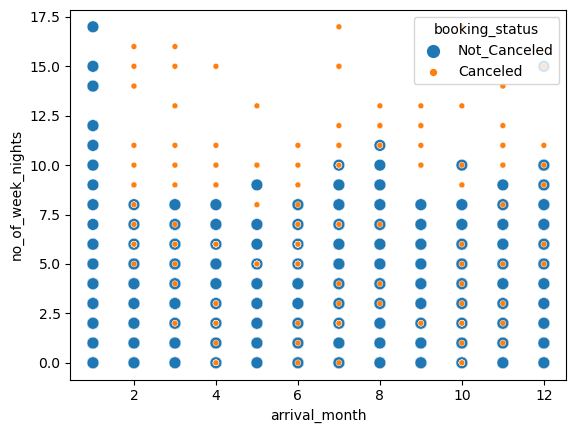

In [18]:

sns.scatterplot(x="arrival_month",y="no_of_week_nights",data=df,hue="booking_status",size="booking_status")

First, we can conclude that there is no cancelation in the first month, and the higher the number of the nights the higher is the probability to cancel.
Meanwhile, we can notice that for the month 6 and 10 there are more cancelation for the small night of the week

## **unbalincing issue**
I am going to pick the most popular methods I found

In [19]:
#splitting target and features
X=df.drop(columns="booking_status")
y=df['booking_status']

<Axes: ylabel='booking_status'>

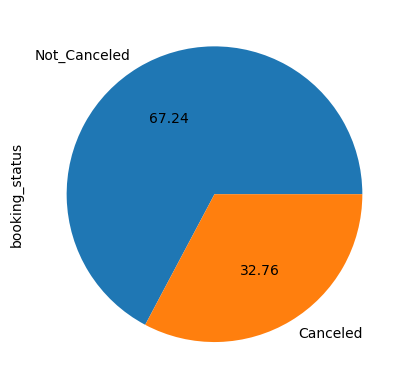

In [20]:
y.value_counts().plot.pie(autopct='%.2f')

### **Random Undersampling**

``'not minority'`` = resample all classes but the minority class

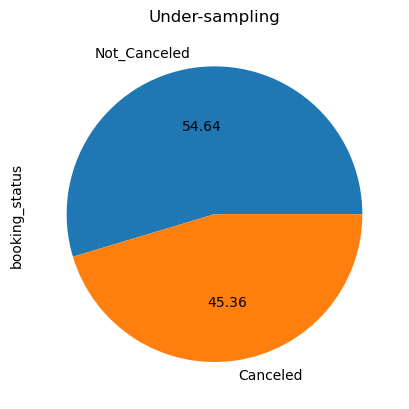

In [21]:
rus = RandomUnderSampler(sampling_strategy=0.83)
X_rus, y_rus = rus.fit_resample(X, y)

ax = y_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [22]:
# Class distribution
y_rus.value_counts()

Not_Canceled    14319
Canceled        11885
Name: booking_status, dtype: int64

### **Random Oversampling**

``"not majority"`` = resample all classes but the majority class



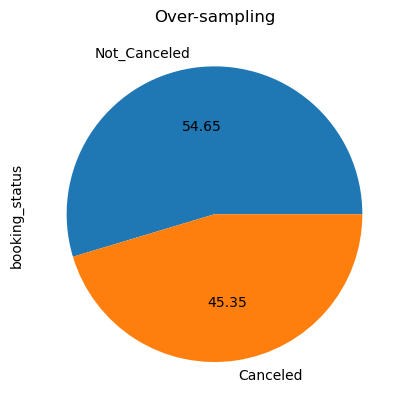

In [23]:

ros = RandomOverSampler(sampling_strategy=0.83)

X_ros, y_ros = ros.fit_resample(X, y)

ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [24]:
y_ros.value_counts()

Not_Canceled    24390
Canceled        20243
Name: booking_status, dtype: int64

### **Double split method**
 I am thinking of splitting X in two sections then merge the models working with X1,y and X2,y
 I will come back to this when I have time

## **pre-processing**

In [25]:
y_rus

2            Canceled
3            Canceled
4            Canceled
5            Canceled
12           Canceled
             ...     
31115    Not_Canceled
29909    Not_Canceled
18963    Not_Canceled
22238    Not_Canceled
33105    Not_Canceled
Name: booking_status, Length: 26204, dtype: object

In [26]:
#y_rus=y_rus.oneHotEncoder(sparse=False, Handle_unknown="ignore").reshape(-1,1)
enc = OrdinalEncoder()
y_rus = enc.fit_transform(y_rus.values.reshape(-1, 1))

In [27]:
y_rus

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

### RUS

In [28]:
#Perform a train test split
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus,random_state=42)


In [29]:
# instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [30]:
# instantiate the standard scaler, OneHotEncoder and Imputers
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [31]:
# Setup the pipelines for the numeric and categorical data
num_processor = make_pipeline(mean_imputer, scaler)
cat_processor = make_pipeline(freq_imputer, encoder)

In [32]:
# Setup the tuples to pair the processors with the make column selectors
num_tuple = (num_processor, num_selector)
cat_tuple = (cat_processor, cat_selector)

In [33]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [34]:
col_transformer.fit(X_train_rus)

C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D4CDD4B20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000017D4CDD5A80>)])

In [35]:
# Transform the X_train and the X_test

X_train_processed_rus = col_transformer.transform(X_train_rus)

X_test_processed_rus = col_transformer.transform(X_test_rus)

## **Modeling**

In [36]:
# Define a function that takes in arguments and prints out a classification report, confusion matrix and ROC AUC
def evaluate_classification(model, X_test, y_test, cmap=None,
                            normalize='true', classes=None, figsize=(20,5)):
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=2, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens',
                                        display_labels=classes,
                                        ax=ax[0])

  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues',
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])

  plt.show()

### Logisticregression

RUS

In [37]:
# Make an instance of the model with default parameters
logreg = LogisticRegression()
# Get predictions for calculating score
logreg.fit(X_train_processed_rus,y_train_rus)
#Prediction
train_pred = logreg.predict(X_train_processed_rus)

test_preds = logreg.predict(X_test_processed_rus)
# Calculate accuracy

C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
param_grid = {'C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000], 'penalty':['l1', 'l2'],'solver': ['liblinear','saga']},

In [39]:
dt_grid_search = GridSearchCV(logreg, param_grid)

In [40]:
dt_grid_search.fit(X_train_processed_rus, y_train_rus)

C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array w

GridSearchCV(estimator=LogisticRegression(),
             param_grid=({'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                10000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']},))

In [41]:
dt_grid_search.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [42]:
best_model = dt_grid_search.best_estimator_

In [43]:


best_model.fit(X_train_processed_rus,y_train_rus)


C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, solver='liblinear')

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      2972
         1.0       0.78      0.83      0.80      3579

    accuracy                           0.78      6551
   macro avg       0.78      0.77      0.78      6551
weighted avg       0.78      0.78      0.78      6551



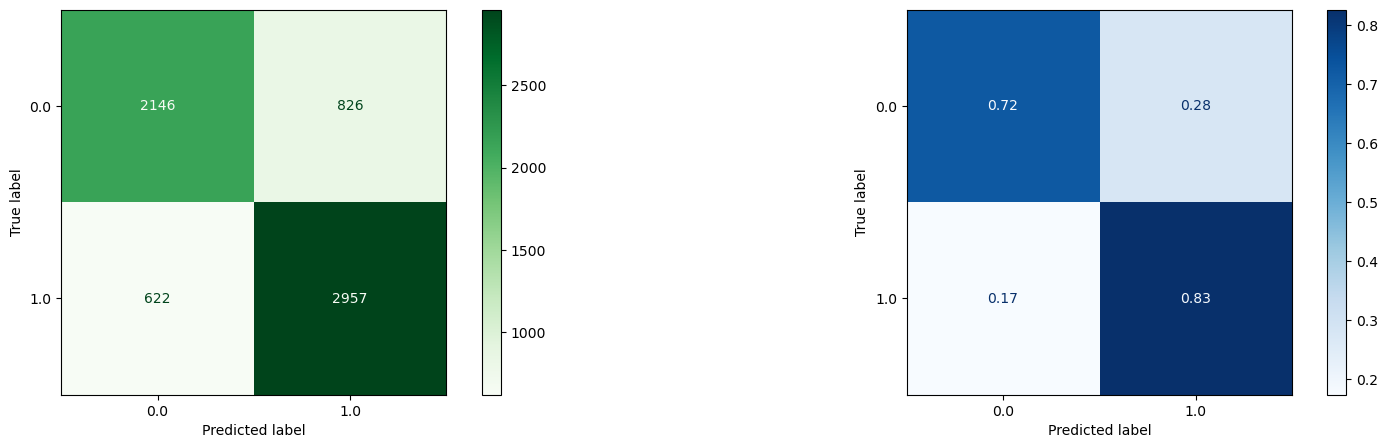

In [44]:
evaluate_classification(best_model, X_test_processed_rus, y_test_rus, cmap=None,
                            normalize='true', classes=None, figsize=(20,5))

## k-nearest neighbors:

RUS

In [45]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_processed_rus,y_train_rus)


C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [46]:
model=KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,6,7,8,10], 'weights':['uniform', 'distance'], 'leaf_size': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]},

In [47]:
grid_search=GridSearchCV(model,param_grid)

In [48]:
grid_search.fit(X_train_processed_rus,y_train_rus)
grid_search.best_params_

C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d ar

{'leaf_size': 2, 'n_neighbors': 10, 'weights': 'distance'}

In [49]:
best_model_knn = grid_search.best_estimator_
knn_pipe = make_pipeline(best_model_knn)

In [50]:
knn_pipe.fit(X_train_processed_rus,y_train_rus)
train_preds = knn_pipe.predict(X_train_processed_rus)
test_preds = knn_pipe.predict(X_test_processed_rus)

C:\Users\lewis\anaconda3\envs\dojo-env\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      2972
         1.0       0.85      0.85      0.85      3579

    accuracy                           0.84      6551
   macro avg       0.84      0.84      0.84      6551
weighted avg       0.84      0.84      0.84      6551



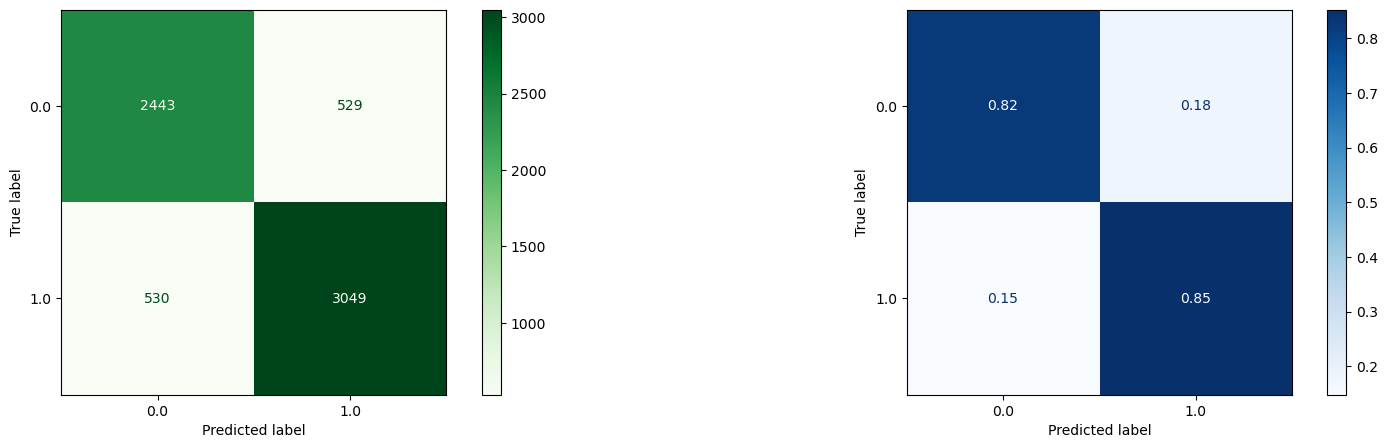

In [51]:
evaluate_classification(best_model_knn, X_test_processed_rus, y_test_rus, cmap=None,
                            normalize='true', classes=None, figsize=(20,5))

## XGBoost

In [52]:
xgb = XGBClassifier()
xgb.fit(X_train_processed_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      2972
         1.0       0.87      0.90      0.88      3579

    accuracy                           0.87      6551
   macro avg       0.87      0.87      0.87      6551
weighted avg       0.87      0.87      0.87      6551



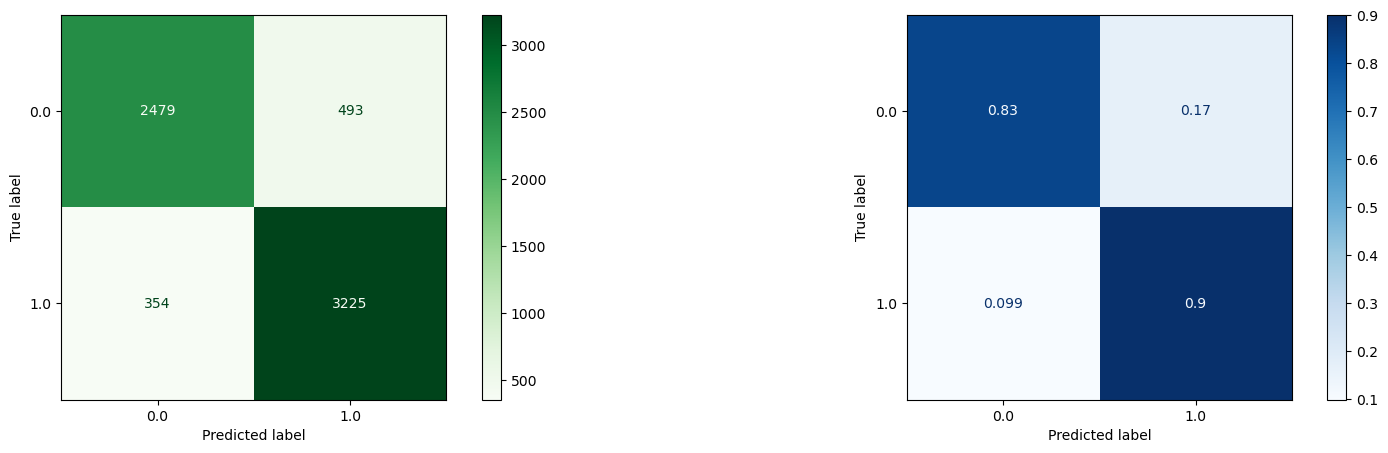

In [53]:
evaluate_classification(xgb, X_test_processed_rus, y_test_rus, cmap=None,
                            normalize='true', classes=None, figsize=(20,5))